# clip-05s.jl

Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, CmdStan
#gr(size=(600,800));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "03")
cd(ProjDir)

Define the Stan language model

In [3]:
binomialstanmodel = "
// Inferring a Rate
data {
  int N;
  int<lower=0> k[N];
  int<lower=1> n[N];
}
parameters {
  real<lower=0,upper=1> theta;
  real<lower=0,upper=1> thetaprior;
}
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  thetaprior ~ beta(1, 1);

  // Observed Counts
  k ~ binomial(n, theta);
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [4]:
stanmodel = Stanmodel(name="binomial", monitors = ["theta"], model=binomialstanmodel,
  output_format=:mcmcchains);


File /Users/rob/.julia/dev/StatisticalRethinking/scripts/03/tmp/binomial.stan will be updated.



Use 16 observations

In [5]:
N2 = 4^2
d = Binomial(9, 0.66)
n2 = Int.(9 * ones(Int, N2))
k2 = rand(d, N2);

Input data for cmdstan

In [6]:
binomialdata = Dict("N" => length(n2), "n" => n2, "k" => k2);

Sample using cmdstan

In [7]:
rc, chn, cnames = stan(stanmodel, binomialdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);

Inference for Stan model: binomial_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.025, 0.027, 0.024, 0.025) seconds, 0.10 seconds total
Sampling took (0.043, 0.040, 0.044, 0.041) seconds, 0.17 seconds total

                Mean     MCSE  StdDev     5%   50%   95%    N_Eff  N_Eff/s    R_hat
lp__             -93  2.7e-02     1.1    -95   -92   -92  1.7e+03  1.0e+04  1.0e+00
accept_stat__   0.92  1.5e-03    0.11   0.69  0.96   1.0  5.0e+03  3.0e+04  1.0e+00
stepsize__      0.78      nan   0.041   0.73  0.79  0.84      nan      nan  2.6e+13
treedepth__      2.1  1.2e-02    0.72    1.0   2.0   3.0  3.6e+03  2.1e+04  1.0e+00
n_leapfrog__     5.2  8.2e-02     5.1    1.0   3.0    15  3.9e+03  2.3e+04  1.0e+00
divergent__     0.00      nan    0.00   0.00  0.00  0.00      nan      nan      nan
energy__          94  3.9e-02     1.5     92    93    97  1.5e+03  9.1e+03  1.0e+00
theta           0.69  7.6e-04   0.038   

Describe the draws

In [8]:
describe(chn)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean     │ std      │ naive_se    │ mcse        │ ess    │
│     │ Symbol     │ Float64  │ Float64  │ Float64     │ Float64     │ Any    │
├─────┼────────────┼──────────┼──────────┼─────────────┼─────────────┼────────┤
│ 1   │ theta      │ 0.690867 │ 0.038398 │ 0.000607125 │ 0.000776256 │ 2548.0 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ theta      │ 0.611533 │ 0.665657 │ 0.691834 │ 0.718057 │ 0.762637 │


Plot the 4 chains

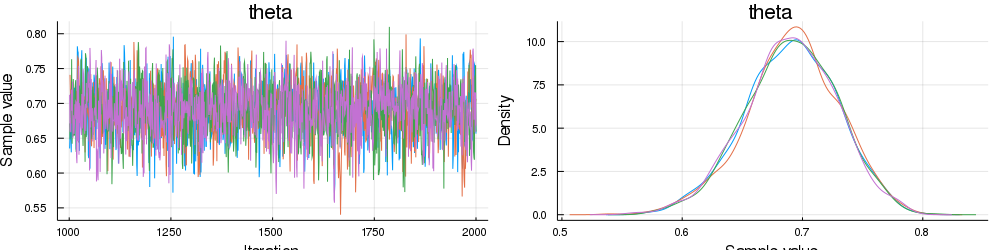

In [9]:
if rc == 0
  plot(chn)
end

End of `03/clip-05s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*